In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the data
stocks = pd.read_csv("datasets/stock_data.csv")
sp = pd.read_csv("datasets/benchmark_data.csv")

# Rename the columns to be able to merge the data
stocks = stocks.rename(columns={"Date":"date"})
sp = sp.rename(columns={"Date":"date"})

# Merge the data
df = pd.merge(stocks, sp, on="date")

# Calculate returns
df[["amazon_returns", "facebook_returns", "sp_returns"]] = df[["Amazon", "Facebook", "S&P 500"]].pct_change()

# Drop missing values
df.dropna(inplace=True)

In [15]:
# Calculate average returns
mean_amazon_returns = df["amazon_returns"].mean()
mean_facebook_returns = df["facebook_returns"].mean()
mean_sp_returns = df["sp_returns"].mean()


In [20]:
# Calculate standard deviations
std_amazon_returns = df["amazon_returns"].std()
std_facebook_returns = df["facebook_returns"].std()
std_sp_returns = df["sp_returns"].std()

In [17]:
# Calculate Sharpe Ratios
amazon_sharpe_ratio = mean_amazon_returns / std_amazon_returns
facebook_sharpe_ratio = mean_facebook_returns / std_facebook_returns
sp_sharpe_ratio = mean_sp_returns / std_sp_returns

# Print the results
print("Amazon Sharpe Ratio: ", amazon_sharpe_ratio)
print("Facebook Sharpe Ratio: ", facebook_sharpe_ratio)
print("S&P 500 Sharpe Ratio: ", sp_sharpe_ratio)

Amazon Sharpe Ratio:  0.04449097512748566
Facebook Sharpe Ratio:  0.03506529979066771
S&P 500 Sharpe Ratio:  0.05581270326498471


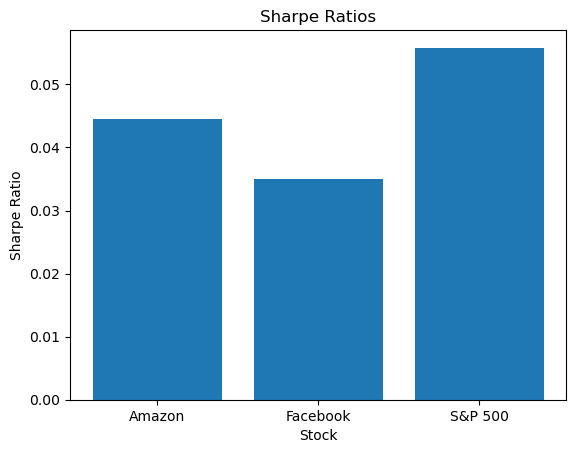

In [18]:
# Plot the results
plt.bar(["Amazon", "Facebook", "S&P 500"], [amazon_sharpe_ratio, facebook_sharpe_ratio, sp_sharpe_ratio])
plt.title("Sharpe Ratios")
plt.xlabel("Stock")
plt.ylabel("Sharpe Ratio")
plt.show()